   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

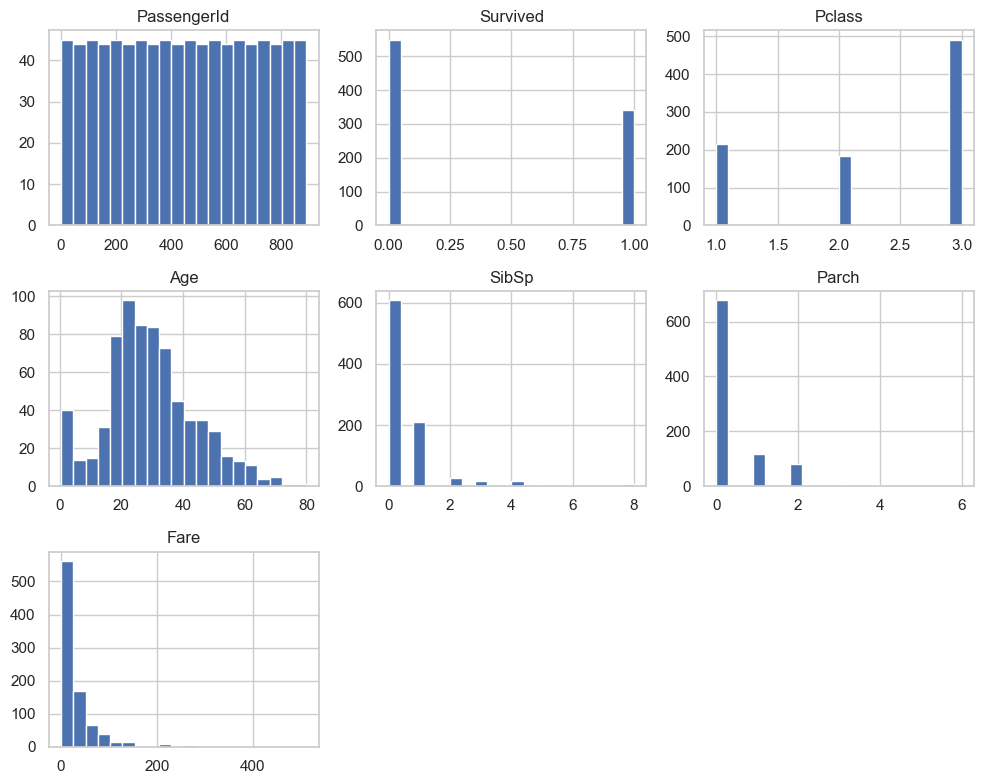

Titan Data

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0       3  22.0      1      0   7.2500      True       False   
1           1       1  38.0      1      0  71.2833     False       False   
2           1       3  26.0      0      0   7.9250     False       False   
3           1       1  35.0      1      0  53.1000     False       False   
4           0       3  35.0      0      0   8.0500      True       False   
..        ...     ...   ...    ...    ...      ...       ...         ...   
886         0       2  27.0      0      0  13.0000      True       False   
887         1       1  19.0      0      0  30.0000     False       False   
888         0       3  28.0      1      2  23.4500     False       False   
889         1       1  26.0      0      0  30.0000      True       False   
890         0       3  32.0      0      0   7.7500      True        True   

     Embarked_S  
0          True  
1         False  
2          True  
3  

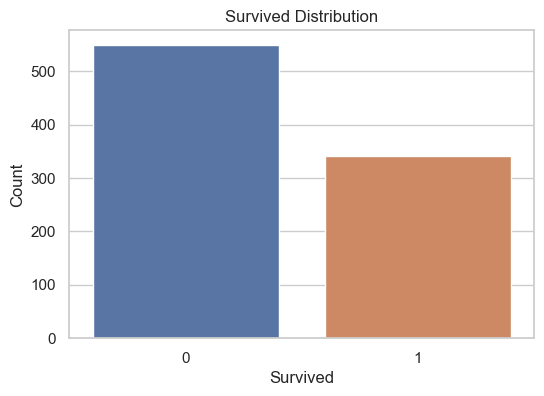

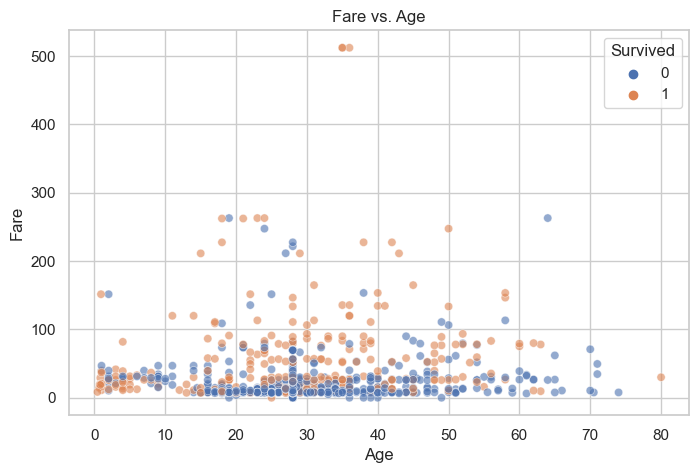

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



data_url = "C:/Users/RavaliGandhavarapu/Downloads/titanic.csv"  # Replace with the actual URL

# Load the Titanic dataset
titanic_data = pd.read_csv(data_url)

# View the first few rows of the dataset
print(titanic_data.head())

# Get summary statistics of numerical columns
print(titanic_data.describe())

# Get information about the data types and missing values
print(titanic_data.info())

# Histograms of numerical columns
titanic_data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Drop unnecessary columns (e.g., PassengerId, Name, Ticket, Cabin)
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values in 'Age', 'Embarked' and 'Fare' columns
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Convert categorical features into numerical values using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

print('Titan Data\n')
print(titanic_data)

# Split the data into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Create a DataFrame to compare the results
model_comparison = pd.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy_svm, accuracy_rf],
    'Precision': [precision_svm, precision_rf],
    'Recall': [recall_svm, recall_rf],
    'F1 Score': [f1_svm, f1_rf]
})

print(model_comparison)

# Set style for the plots
sns.set(style='whitegrid')

# Bar chart for the distribution of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Scatter plot for Fare vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data, alpha=0.6)
plt.title('Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


 

